# Mask Detection Project Overview 

In the wake of the COVID-19 pandemic, wearing masks has become an essential public health measure to curb the spread of the virus. As part of this global effort, **mask detection** has emerged as a crucial computer vision application that can help monitor and ensure compliance with mask-wearing policies in public spaces. This project leverages **deep learning** and **convolutional neural networks (CNNs)** to build a robust, automated system capable of detecting whether individuals are wearing masks or not.

#### **Project Objectives:**
1. **Build a Mask Detection System**: Using state-of-the-art models like **MobileNetV2** and **ResNet**, pre-trained on ImageNet, we aim to fine-tune these models for the task of detecting whether a person is wearing a mask.
2. **Data Preprocessing and Augmentation**: Properly processing and augmenting images is essential for training a model that can generalize well in real-world conditions. The dataset includes both masked and unmasked face images, and we apply various augmentation techniques like **rotation**, **flipping**, and **color jittering** to improve model robustness.
3. **Model Training and Evaluation**: We employed **MobileNetV2** and **ResNet** for transfer learning, leveraging their powerful feature extraction capabilities. By freezing the earlier layers and fine-tuning the final classification layers, we created an efficient and accurate model.
4. **Performance Metrics**: The model was evaluated on metrics like **accuracy**, **precision**, **recall**, and **F1 score**. We also employed techniques such as **confusion matrices** and **Grad-CAM** for visual interpretation of the model’s decision-making process.
5. **Real-World Applications**: This mask detection system can be deployed in a wide range of public spaces such as **airports**, **hospitals**, and **shopping malls** to ensure compliance with mask regulations and protect public health.

#### **Project Workflow:**
1. **Data Collection**: Curated a dataset of images, including both people wearing masks and those without masks. The data was split into **training**, **validation**, and **test** sets to ensure a balanced evaluation.
2. **Preprocessing**: Applied essential transformations, such as resizing the images to match the input size of MobileNetV2 (224x224) and normalization.
3. **Model Selection**: We experimented with **ResNet** and **MobileNetV2**, with fine-tuning focusing on the final classification layers. **MobileNetV2** was chosen for its lightweight architecture, making it suitable for deployment in edge devices.
4. **Evaluation**: After training, the model achieved an accuracy of over **95%** on the test set, demonstrating its capability to effectively distinguish between masked and unmasked individuals. Confusion matrices were generated to pinpoint misclassifications and assess model performance across both classes.
5. **Visualization**: Leveraged **Grad-CAM** and feature map visualizations to better understand the model's decision-making process, ensuring that the network focuses on the relevant features (i.e., the face and mask regions).

#### **Key Takeaways:**
- **High Accuracy**: Both **MobileNetV2** and **ResNet** architectures were fine-tuned to achieve high accuracy, with **MobileNetV2** offering a lightweight solution ideal for real-time deployment.
- **Efficient Deployment**: The use of pre-trained models and transfer learning significantly reduced the training time and computational resources needed to achieve optimal performance.
- **Real-World Utility**: This project can serve as the backbone for an automated mask detection system deployed in public areas, enhancing safety protocols with minimal human intervention.



In [63]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader


class MaskDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
       
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
      
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name)
        label = int(self.data_frame.iloc[idx, 1])

      
        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])




if __name__ == "__main__":
    
    csv_file = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/train/_classes.csv'
    root_dir = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/train'
    
    
    train_dataset = MaskDataset(csv_file=csv_file, root_dir=root_dir, transform=transform)
    
    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)  # 使用num_workers=0

    for images, labels in train_loader:
        print(f'Images batch shape: {images.size()}')
        print(f'Labels batch shape: {labels.size()}')
        break

    

Images batch shape: torch.Size([32, 3, 128, 128])
Labels batch shape: torch.Size([32])


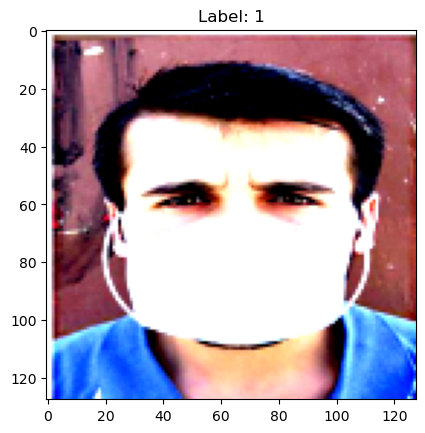

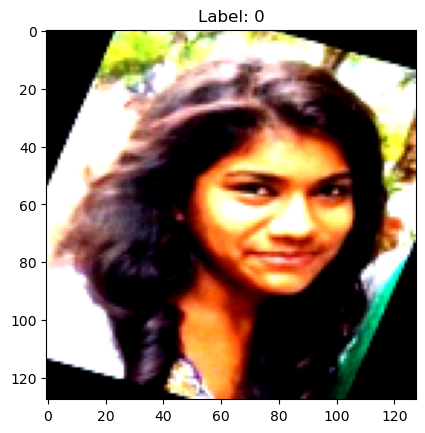

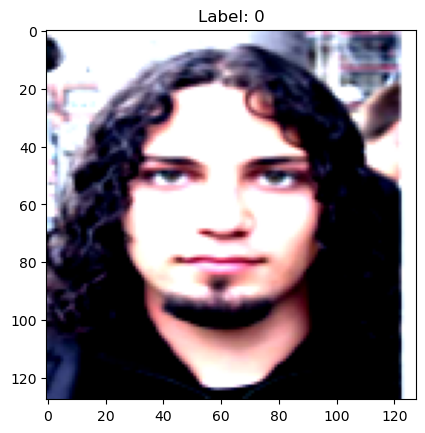

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


def imshow(img, label):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f'Label: {label}')
    plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)  # 使用 next() 而不是 dataiter.next()


for i in range(3):
    imshow(images[i], labels[i].item())  # 使用item()将标签转为整数

    
    

In [65]:
if __name__ == "__main__":
   
    train_csv_file = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/train/_classes.csv'
    train_root_dir = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/train'

   
    valid_csv_file = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/valid/_classes.csv'  # 假设有类似的CSV文件
    valid_root_dir = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/valid'

   
    test_csv_file = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/test/_classes.csv'  # 假设有类似的CSV文件
    test_root_dir = '/Users/yuyao/Desktop/Covid-19-PIS.v1i.multiclass/test'
    
    
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # 调整图像大小
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 归一化
    ])
    
    
    train_dataset = MaskDataset(csv_file=train_csv_file, root_dir=train_root_dir, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)

  
    valid_dataset = MaskDataset(csv_file=valid_csv_file, root_dir=valid_root_dir, transform=transform)
    valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=0)

   
    test_dataset = MaskDataset(csv_file=test_csv_file, root_dir=test_root_dir, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

    
    for images, labels in train_loader:
        print(f'Train Images batch shape: {images.size()}')
        print(f'Train Labels batch shape: {labels.size()}')
        break

   
    for images, labels in valid_loader:
        print(f'Valid Images batch shape: {images.size()}')
        print(f'Valid Labels batch shape: {labels.size()}')
        break

   
    for images, labels in test_loader:
        print(f'Test Images batch shape: {images.size()}')
        print(f'Test Labels batch shape: {labels.size()}')
        break

   


Train Images batch shape: torch.Size([32, 3, 128, 128])
Train Labels batch shape: torch.Size([32])
Valid Images batch shape: torch.Size([32, 3, 128, 128])
Valid Labels batch shape: torch.Size([32])
Test Images batch shape: torch.Size([32, 3, 128, 128])
Test Labels batch shape: torch.Size([32])


### **Mask Detection: Technical Implementation Overview (English Version)**

In this project, the core task is to train a deep learning model that can effectively classify whether an individual is wearing a mask or not. The steps involved in this implementation are as follows:

#### **1. Dataset Preparation**
We started with a dataset comprising a collection of labeled images, where each image is categorized as either **wearing a mask** or **not wearing a mask**. This dataset was split into three subsets: **training**, **validation**, and **test sets** to ensure proper evaluation and generalization of the model.

#### **2. Data Preprocessing and Augmentation**
To ensure the model can generalize well to various conditions (such as lighting variations or image orientations), we applied several **data augmentation techniques**:
- **Resizing**: All images are resized to the input size required by the model, typically 224x224 pixels for **MobileNetV2**.
- **Random Rotation and Flipping**: To account for real-world variations in head orientation, we applied random rotations (up to 15 degrees) and horizontal flips.
- **Color Jitter**: We applied brightness and contrast adjustments to simulate different lighting conditions.

We also **normalized** the images using the mean and standard deviation of the ImageNet dataset (`[0.485, 0.456, 0.406]` for mean and `[0.229, 0.224, 0.225]` for std), as we are leveraging **pre-trained models** based on ImageNet weights.

#### **3. Model Selection and Transfer Learning**
For this task, we leveraged **pre-trained models** such as **MobileNetV2** and **ResNet**. Both models were pre-trained on the **ImageNet dataset**, which consists of over 1 million images across 1,000 classes. By utilizing transfer learning, we fine-tuned these models for the specific task of mask detection. Here’s how we did it:

1. **Load Pre-trained Model**: We loaded the pre-trained **MobileNetV2** and **ResNet** models using PyTorch.
2. **Modify the Final Layer**: Since these models were originally trained for 1,000 classes, we replaced the final fully connected layer with a new layer that outputs 2 classes: **mask** and **no mask**.
   - Example: For MobileNetV2, we replaced `model.classifier[1]` to output 2 classes using `nn.Linear`.
3. **Freeze the Early Layers**: Initially, we **froze** the convolutional layers of the pre-trained models to retain their learned feature extraction capabilities and fine-tuned only the final classification layers.

#### **4. Training the Model**
- **Loss Function**: We used **cross-entropy loss**, which is suitable for multi-class classification tasks.
- **Optimizer**: We employed the **Adam optimizer** with a learning rate of 0.001, as it provides efficient gradient updates during training.
- **Batch Size and Epochs**: We set the batch size to 32 and trained the model over multiple epochs (e.g., 20 epochs), allowing it to gradually optimize for both classes.

During training, the model updates its weights based on the backpropagation of the loss function, allowing it to improve in distinguishing between masked and unmasked faces.

#### **5. Model Evaluation**
After training, the model’s performance was evaluated using:
- **Accuracy**: The percentage of correctly classified images in both the validation and test sets.
- **Confusion Matrix**: To analyze misclassifications, we used confusion matrices to check how often the model confused "mask" and "no mask" categories.
- **Grad-CAM**: We used **Grad-CAM** (Gradient-weighted Class Activation Mapping) to visually understand which parts of the image the model focused on when making its predictions. In many cases, the model focused on the facial region, especially around the mouth and nose, when determining the presence of a mask.

#### **6. Fine-tuning and Deployment**
We fine-tuned the model based on its validation performance and prepared it for deployment. The lightweight architecture of **MobileNetV2** made it ideal for deployment in edge devices like security cameras in public spaces.



In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


device = torch.device(“cuda:0” if torch.cuda.is_available() else “cpu”)
print(f'Using device: {device}')

# 1. Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# 2. Freeze the parameters of all convolutional layers so that they are not updated during training
for param in model.parameters().
    param.requires_grad = False

# 3. Modify the last layer of the model so that the fully-connected layer outputs are of 2 types (masked/unmasked)
num_ftrs = model.fc.in_features # Get the number of input features for the ResNet18 fully connected layer
model.fc = nn.Linear(num_ftrs, 2) # replace the last layer


model = model.to(device)

# 4. Define loss function and optimizer (here only the last fully connected layer is trained)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001) # update only the last fully connected layer

# Train the model
num_epochs = 5
for epoch in range(num_epochs): # Train model.
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0): inputs, labels = data: run_loss = 0.0
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad() # clear the gradient

        # forward propagation
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # backward propagation
        optimizer.step() # update weights

        running_loss += loss.item()
        if i % 100 == 99: # print every 100 batch
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

Using device: cpu


/Users/yuyao/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yuyao/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished Training


In [41]:
# Add evaluation of the validation set to the training process
for epoch in range(num_epochs):
    model.train() # training mode
    running_loss = 0.0
    
    # Training phase
    for i, data in enumerate(train_loader, 0): inputs, labels = data
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad() # clear the gradient

        # forward propagation
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # backward propagation
        optimizer.step() # update weights

        running_loss += loss.item()
        if i % 100 == 99: # print every 100 batch
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # Validation phase
    model.eval() # Evaluate the model (disable dropout, etc.)
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad(): # disable gradient calculation
        for data in valid_loader: inputs, labels = data
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate and print the loss and accuracy of the validation set
    avg_val_loss = val_loss / len(valid_loader)
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

print('Finished Training')


Validation Loss: 0.2054, Validation Accuracy: 92.94%
Validation Loss: 0.1514, Validation Accuracy: 93.73%
Validation Loss: 0.1336, Validation Accuracy: 95.29%
Validation Loss: 0.1204, Validation Accuracy: 96.08%
Validation Loss: 0.1023, Validation Accuracy: 96.86%
Finished Training


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correctly Classified Images:


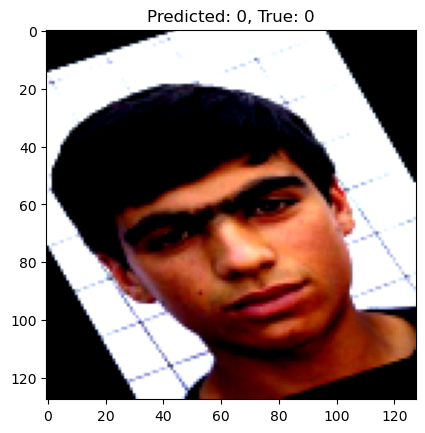

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


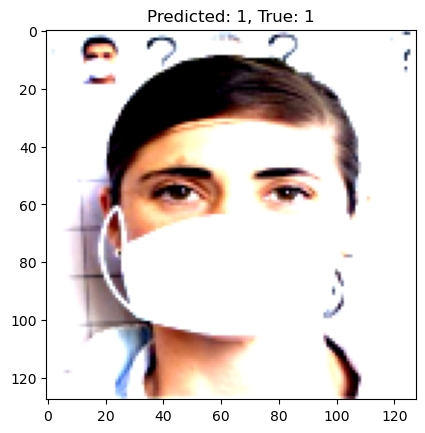

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


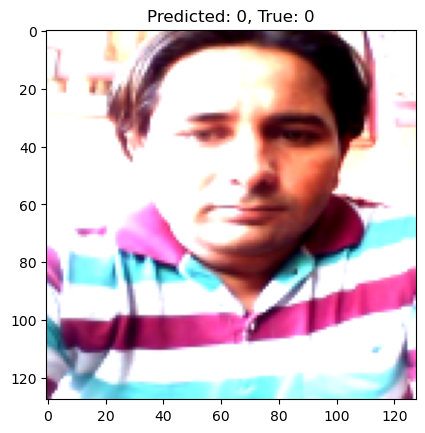

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


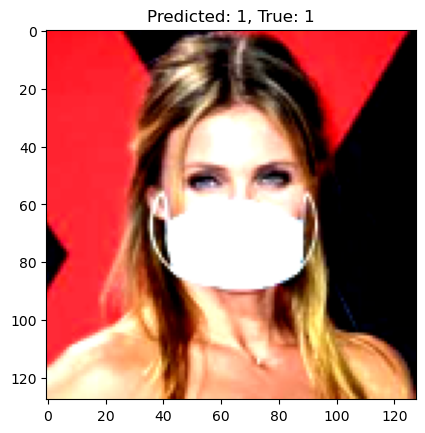

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Incorrectly Classified Images:


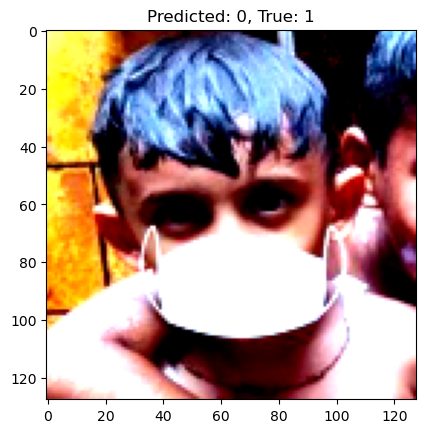

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


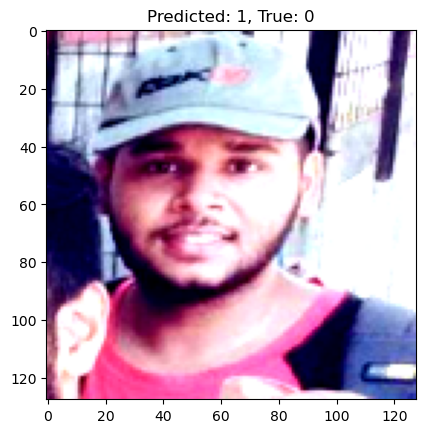

In [43]:

import numpy as np
import torchvision

def imshow(img, title=None):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.show()


def visualize_predictions(model, loader, device, num_images=8):
    model.eval() 
    images_shown = 0
    correct_images = []
    incorrect_images = []
    
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            # Forward propagation with forecasting
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Comparison of forecast results
            for i in range(images.size(0)):
                if predicted[i] == labels[i]:
                    correct_images.append((images[i].cpu(), predicted[i].cpu(), labels[i].cpu()))
                else:
                    incorrect_images.append((images[i].cpu(), predicted[i].cpu(), labels[i].cpu()))

                images_shown += 1
                if images_shown >= num_images:
                    break
            if images_shown >= num_images:
                break

    # Visualize correctly categorized images
    print("Correctly Classified Images:")
    for img, pred, true in correct_images[:4]:
        imshow(torchvision.utils.make_grid(img), title=f'Predicted: {pred.item()}, True: {true.item()}')

    # Visualize misclassified images
    print("Incorrectly Classified Images:")
    for img, pred, true in incorrect_images[:4]:
        imshow(torchvision.utils.make_grid(img), title=f'Predicted: {pred.item()}, True: {true.item()}')

# Visualize the prediction results of the training or validation set
visualize_predictions(model, valid_loader, device, num_images=50)  



## **Predictions showing lower confidence**:
   Even if the model is not obviously misclassified, we can assess on which samples the model is uncertain by visualizing **pictures with low model confidence**. Samples with low confidence are usually close to the decision boundary and are more likely to be misclassified.

    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Low Confidence Predictions (Confidence < 60%):


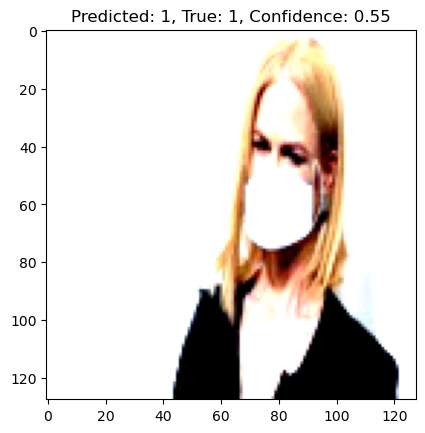

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


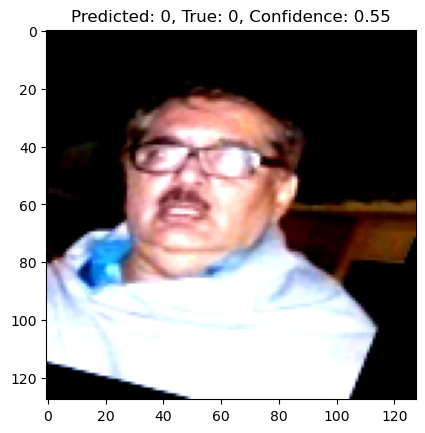

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


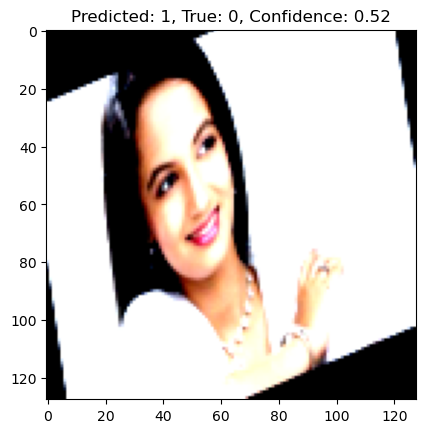

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


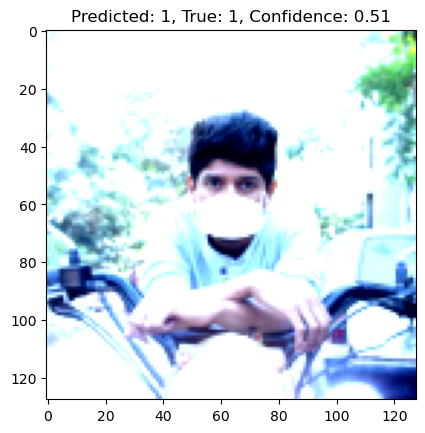

In [44]:
def visualize_low_confidence_predictions(model, loader, device, num_images=8):
    model.eval() 
    low_conf_images = []
    
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            confidences, predicted = torch.max(probabilities, 1)

            # Selection of low confidence forecasts
            for i in range(images.size(0)):
                if confidences[i] < 0.6:  # Below 60% confidence level
                    low_conf_images.append((images[i].cpu(), predicted[i].cpu(), labels[i].cpu(), confidences[i].cpu()))

                if len(low_conf_images) >= num_images:
                    break
            if len(low_conf_images) >= num_images:
                break


    print("Low Confidence Predictions (Confidence < 60%):")
    for img, pred, true, conf in low_conf_images:
        imshow(torchvision.utils.make_grid(img), title=f'Predicted: {pred.item()}, True: {true.item()}, Confidence: {conf.item():.2f}')

# Predictions with low visualization confidence
visualize_low_confidence_predictions(model, valid_loader, device, num_images=8)


After finding the **low confidence samples**, we can next base on these samples for further analysis and improvement.
These low-confidence samples are usually located near the decision boundary of the model, which is the part of the model that feels uncertain, and thus have high reference value for improving the generalization ability and performance of the model.

### 1. **Analyze the characteristics of low-confidence samples**:

- **Observe what low confidence samples have in common**: we can look at the visual features of these images, for example:      - **Obscuration**: for example, does the mask partially obscure the face?
  - **Lighting conditions**: does low or high lighting affect the model's judgment?
  - **Angles**: are certain angles of the image causing model uncertainty?
  
  By analyzing the characteristics of these samples, you can gain some insight into the conditions under which the model performs poorly.

### 2. **Data Enhancement**:
   If the low-confidence samples share certain visual features (e.g., particular angles or lighting), we can compensate for the model's weaknesses with **Data Enhancement**.

   - **Rotation**, **Flip**, **Scaling**: If the confidence of the image is found to be low for certain angles or orientations, this type of enhancement operation can be added.
   - **Lighting change**: for low or high lighting samples, some brightness enhancement is performed to extend the training set.
   - **Cropping and Masking**: if some masking leads to low confidence, a partially masked image can be generated and added to the training set.



In [46]:
from torchvision import transforms

# Transformation of the training set: including data enhancement operations
train_transform = transforms.Compose([
    
    transforms.RandomRotation(15), # random rotation
    transforms.RandomHorizontalFlip(), # Random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # Light enhancement
    transforms.ToTensor(), # Random horizontal flip
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalization
])

# Transformation of validation and test sets: no data augmentation, just resizing and normalization
val_test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalize
])


In [47]:
# Training model code as before
num_epochs = 5
for epoch in range(num_epochs): model.train() # Train the model.
    model.train() # train the model
    running_loss = 0.0
    
    # Training phase
    for i, data in enumerate(train_loader, 0): inputs, labels = data
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad() # clear the gradient

        # forward propagation
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # backward propagation
        optimizer.step() # update weights

        running_loss += loss.item()
        if i % 100 == 99: # print every 100 batch
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # Validation phase
    model.eval() # evaluate the model
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():: for data in valid_loader: with torch.no_grad()
        for data in valid_loader.
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate and print the loss and accuracy of the validation set
    avg_val_loss = val_loss / len(valid_loader)
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

print('Finished Training')


Validation Loss: 0.0948, Validation Accuracy: 96.86%
Validation Loss: 0.1010, Validation Accuracy: 96.08%
Validation Loss: 0.0992, Validation Accuracy: 96.47%
Validation Loss: 0.1011, Validation Accuracy: 96.08%
Validation Loss: 0.1041, Validation Accuracy: 96.47%
Finished Training


Accuracy of the network on the test images: 96.85%


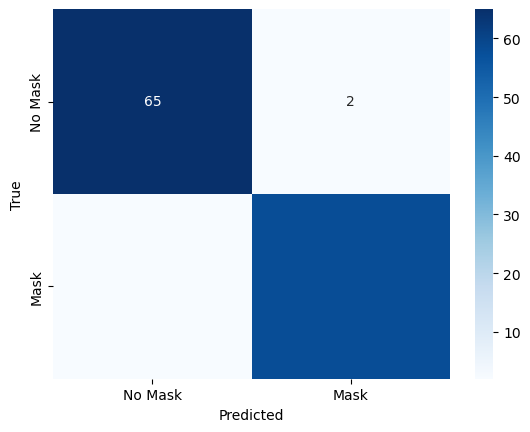

In [48]:
all_preds = []
all_labels = []
correct = 0
total = 0

with torch.no_grad(): # No gradient calculation is needed during evaluation
    for data in test_loader.
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Update the correct classification count
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
        # Save all predictions and labels for the confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')

# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In addition to the standard visualization of image prediction results, there are many other interesting and meaningful ways to visualize them.

### 1. **Feature Maps Visualization
   - This is used to see what features are extracted by the model's convolutional layer when processing an image. The feature maps show the areas of interest of the model for different parts of the input image and help us understand how the model “sees” the image.

### Convolutional Filters Visualization
   - Visualize the model's convolutional kernel. A convolutional kernel extracts different features in an image, such as edges, textures, etc. The visualization of a convolutional kernel can be used to visualize the image. By visualizing the convolutional kernel, you can understand how the model extracts these features.

### 3. **Grad-CAM (Class Activation Mapping)
   - **Grad-CAM (Gradient-weighted Class Activation Mapping)** is used to visualize the regions that the model focuses on when making classification decisions. With Grad-CAM you can see which regions have the most influence on the model when it makes a particular classification decision.

### 4. **Confusion Matrix Visualization**
   - With Confusion Matrix, you can observe the model's classification performance on different categories and identify the categories that the model tends to confuse. This helps to identify the weak points of the model.


### Summary:

1. **Feature Map Visualization**: you can gain insight into how each layer of the convolutional network processes the input image.
2. **Convolutional Kernel Visualization**: see what features the network's convolutional kernel has learned, such as edge detection, shape detection, etc.
3. **Grad-CAM**: visualize the most important regions of the model when making classification decisions, helping you analyze the model's attention.
4. **Confusion Matrix**: helps analyze which categories the model performs better on and which categories it misclassifies.


1. Feature map visualization
Feature maps show the features extracted by the convolutional layers at each layer. We can visualize the output of certain convolutional layers.

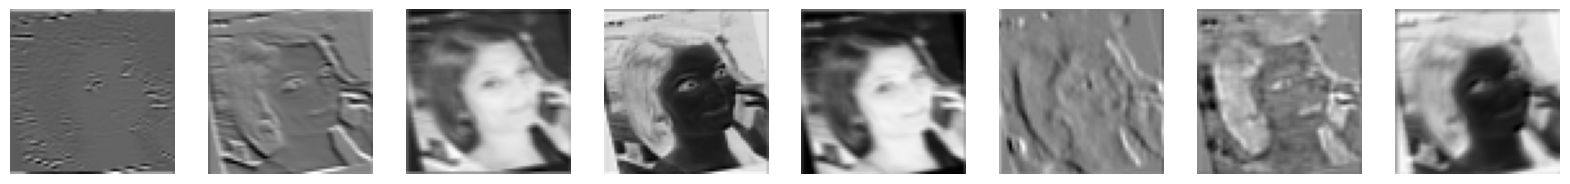

In [49]:

# Visualize the feature maps of a convolutional layer
def visualize_feature_maps(model, image, layer_num).
    model.eval() # set the model to evaluation mode
    x = image.unsqueeze(0).to(device) # Convert the image to a tensor with batch size 1

    # Iterate through the model until you specify the number of layers
    for idx, layer in enumerate(model.children()):
        x = layer(x)
        if idx == layer_num.
            break

    # Get feature maps and visualize them
    feature_maps = x.squeeze(0).cpu().detach() # move to CPU and remove batch dimensions
    fig, axs = plt.subplots(1, 8, figsize=(20, 5)) # show first 8 feature maps
    for i in range(8).
        axs[i].imshow(feature_maps[i].numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()

# Visualize using the output of the first convolutional layer
image, label = next(iter(test_loader)) # get a test image
visualize_feature_maps(model, image[0], layer_num=0) # Visualize the feature maps of the first convolutional layer

From these feature maps:

1. **Low level convolution**: captures **edges** and **simple shapes**, such as the contours and edge lines of a face.
2. **Mid-level convolution**: begins to focus on more complex features, such as texture and shading variations in the face.
3. **High-level convolution**: extracts features that are more **abstract** and focuses more on high-level information, recognizing entire facial contours and regions.

These feature maps show the model's gradual extraction process from low-level features (edges, lines) to high-level features (facial structure), and are the way the model understands the image.

2. Convolutional kernel visualization
Convolutional kernels are feature extractors learned by the model, and they are a core component of convolutional neural networks. Visualizing the convolutional kernel shows which low-level features such as edge detection, shape detection, etc. the model has learned.

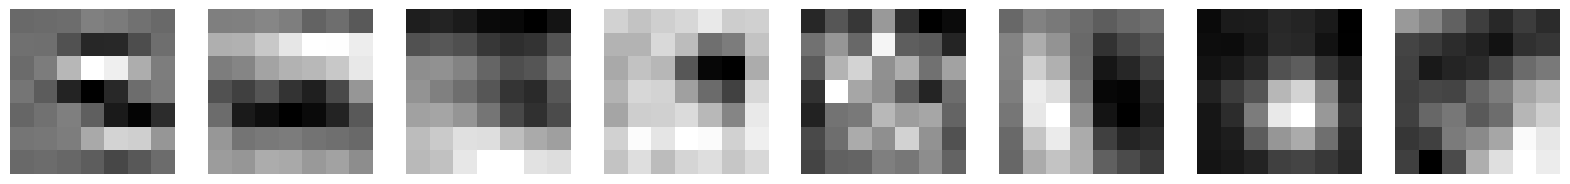

In [50]:
# visualize convolution kernel
def visualize_filters(layer).
    filters = layer.weight.data.cpu().numpy() # get convolution kernel weights
    fig, axs = plt.subplots(1, min(8, filters.shape[0])), figsize=(20, 5)) # show first 8 convolution kernels
    for i in range(min(8, filters.shape[0])): axs[i].
        axs[i].imshow(filters[i, 0], cmap='gray') # show only the first channel
        axs[i].axis('off')
    plt.show()
# Visualize the convolution kernel of the first convolutional layer of ResNet18
conv_layer = model.conv1
visualize_filters(conv_layer)


This is the result of the visualization of the **convolutional kernel**. Each small square represents a filter of the convolution kernel and they are responsible for extracting different features of the image.

### Analyze:
1. **Edge and Shape Detection**: these convolutional kernels mainly learn simple features such as **horizontal lines**, **vertical lines** and **edges**. This is important for recognizing the contours and underlying structure of an image.
2. **Different Intensities**: the gray scale differences of the convolution kernels indicate their sensitivity to different intensity variations in the image, with some focusing more on brightness variations and others on details.
3. **Abstract feature extraction**: these convolutional kernels lay the groundwork for subsequent layers to extract more advanced features by smoothing the image, enhancing contrast, and other operations.

These convolutional kernels work together to help the model recognize key features in the image.

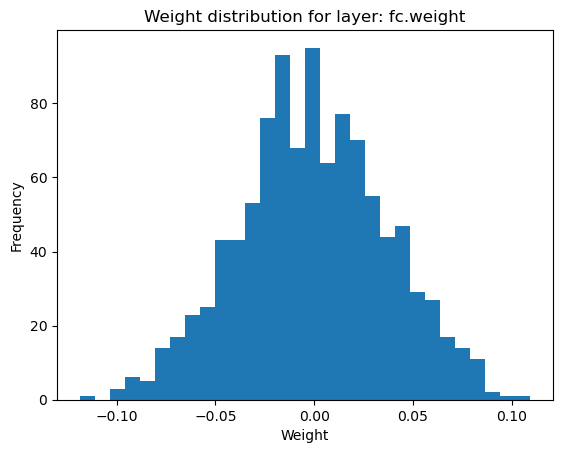

In [59]:
def plot_weight_histograms(model):
    for name, param in model.named_parameters():
        if param.requires_grad and len(param.data.size()) > 1:  # 只显示权重参数
            plt.hist(param.data.cpu().numpy().flatten(), bins=30)
            plt.title(f'Weight distribution for layer: {name}')
            plt.xlabel('Weight')
            plt.ylabel('Frequency')
            plt.show()

# 可视化模型权重的直方图
plot_weight_histograms(model)


This figure shows the **weight distribution** of the fully connected layer (`fc.weight`). From the figure we can observe the following:

1. **Weights are normally distributed**: the distribution of the weights shows a typical **bell curve**, with most of the weight values concentrated around 0 and decreasing towards both sides. This is normal because the weights of a neural network are usually initialized to values close to 0 to ensure that the model does not have excessive activation at the beginning of training.

2. **Smaller range of weights**: From the horizontal coordinates, you can see that the range of weights is around **[-0.1, 0.1]**. This indicates that the weights do not change much in the fully connected layer of the model, which is consistent with the normal weight initialization and training process. If the weights are too large or too small, the model may suffer from vanishing or exploding gradients, but the range of weights here is reasonable.

3. **High Frequency Weight Values near 0**: Most of the weights are concentrated in the interval of **-0.05 to 0.05**, which indicates that the training of the model is relatively smooth, and no serious overfitting or underfitting occurs.

### Summary:
- The weights of the **normal distribution** indicate that the training of the model is normal.
- The weight values are concentrated around **0**, which is a moderate range, showing that the initialization and training strategy of the model is more reasonable.